# Quantitative resume of masses in the Solar System

### Esteemation of masses in the Solar System, excluding Sun and Earth

**Type of bodies considered:**
   * Terrestrial planets
   * First 1500 minor planets
   * Other small bodies: asteroids, comets, meteroids

In [2]:
# All masses are in kilograms
import pandas as pd
import numpy as np

#
# Base data
#
total_mass_sun = 1.989 * 1e30                   # total mass of the Sun
total_mass_of_ss = total_mass_sun * 1.0014      # total mass of the S.S.: 1.991784 e+30
total_mass_non_sun = total_mass_of_ss - total_mass_sun   # the mass of the rest of the system is 0,14% of the total
print(total_mass_non_sun)

total_mass_of_terrestrial = 1.18 * 1e25
total_mass_of_gas_planets =  2.26 * 1e27
total_mass_of_minor_bodies = 4.282 * 1e26

total_non_sun = total_mass_of_terrestrial + total_mass_of_gas_planets + total_mass_of_minor_bodies
total_dust_and_other = total_mass_non_sun - total_non_sun   # moons, asteroids, comets
print(total_dust_and_other)


earth_mass = 5.972 * 1e24
earth_crust_mass = 0.026 * 1e24
crust_over_mass_ratio = earth_crust_mass / earth_mass
#print('Percentage of crust over total mass: % ', mass_crust_ratio)

#
# optimistically consider that we can mine 30% of the crust of a planet's crust
#
crust_reachable = 0.3 * crust_over_mass_ratio
#print('Percentage of a terretrial planet minable: %', crust_reachable)

#
# total minable in terrestrial planets (excluding Earth)
#
total_minable_in_terrestrial = (total_mass_of_terrestrial - earth_mass) * crust_reachable
print('Total mass minable in terrestrial planets: Kg ', total_minable_in_terrestrial)

#
# optimistically consider that we can mine 10% of a minor planet
#
minor_planets_minable_esteem =  0.1
total_mass_minor_planets = earth_mass / 847   # first 1549 minor planets
total_mass_minable_minor_planets = total_mass_minor_planets * minor_planets_minable_esteem
print('Minable mass of minor planets: Kg ', total_mass_minable_minor_planets)

#
# optimistically consider that we can mine 90% of a small body
#
small_bodies_minable_esteem =  0.9
total_mass_small_bodies = total_mass_of_minor_bodies - total_mass_minor_planets
total_mass_minable_small_bodies = total_mass_small_bodies * small_bodies_minable_esteem
print('Minable mass of small bodies: Kg ', total_mass_minable_small_bodies)





2.784600000000035e+27
8.460000000003548e+25
Total mass minable in terrestrial planets: Kg  7.611922304085731e+21
Minable mass of minor planets: Kg  7.050767414403778e+20
Minable mass of small bodies: Kg  3.8537365430932704e+26


### Composition of minerals in Earth's crust

**For every element:** 
```
array[
    total mass in crust, 
    percentage on total crust, 
    esteemed 100 years consumption
]```

In [3]:
#import scipy as sp
from pprint import pprint as pp

labels = np.genfromtxt("minerals.csv", delimiter=',', usecols=0, dtype="|S10", skip_header=1)
symbols = np.genfromtxt("minerals.csv", delimiter=',', usecols=1, dtype="|S10", skip_header=1)
raw_data = np.genfromtxt("minerals.csv", delimiter=',', skip_header=1)[:,2:]
data = {label: row for label, row in zip(symbols, raw_data)}

pp(data)

{b'Al': array([  2.08000000e+21,   8.00000000e+00,   4.50000000e+12]),
 b'B': array([  1.20000000e+15,   2.79000000e-18,   5.00000000e-08]),
 b'Ch': array([  1.70000000e+15,   1.97000000e-18,   1.00000000e-09]),
 b'Cl': array([  3.38000000e+15,   9.91000000e-19,   1.00000000e-09]),
 b'Fe': array([  1.30000000e+21,   5.00000000e+00,   1.10000000e+14]),
 b'K': array([  7.28000000e+20,   2.80000000e+00,   3.40000000e+09]),
 b'Mg': array([  5.46000000e+20,   2.10000000e+00,   7.50000000e+09]),
 b'Mn': array([  1.66900000e+16,   2.01000000e-19,   1.00000000e-07]),
 b'Na': array([  6.76000000e+20,   2.60000000e+00,   2.80000000e+13]),
 b'Ni': array([  1.50000000e+15,   2.23000000e-18,   1.00000000e-09]),
 b'Si': array([  7.02000000e+21,   2.70000000e+01,   7.60000000e+11]),
 b'Ti': array([  1.69000000e+16,   6.50000000e-07,   6.50000000e+11]),
 b'Zn': array([  1.05000000e+15,   3.19000000e-18,   7.00000000e-10])}


### Applying data to a game design

**The data above can be the background for a gaming scenario in which players allocate a budget to mine the chemical elements present in a simulated system.**

**Starting data for a gaming scenario:**

* consider only planets from Mercury to Asteroids Belts (terrestrial planet)
* calculate distances from Earth in AU

In [103]:
index = ['Mercury', 'Venus', 'NEO', 'Mars', 'Asteroids Belt']
terrestrial = ['Mercury', 'Venus', 'Mars']
inner_planets = ['Mercury', 'Venus']
print(crust_reachable)

s = {
    'from-Earth-AU-min': pd.Series(
        [-(1 - 0.48), -(1 - 0.72), 0, 1.38 - 1, 1.78 - 1], index=index),
    'from-Earth-AU-max': pd.Series(
        [-(1 - 0.32), -(1 - 0.70), 0.16, 1.68 - 1, 4.2 - 1], index=index),
    'mass-kg': pd.Series(
        [3.285e23, 4.867e24, 3.2275e8, 6.39e23, 3.2e21], 
        index=index)
    }

s['minable-kg'] = pd.Series(
        [s['mass-kg'][i] * crust_reachable if i in terrestrial else s['mass-kg'][i] * 0.95 for i in index], 
        index=index)

s = pd.DataFrame(s)
s

0.00130609511051574


,from-Earth-AU-max,from-Earth-AU-min,mass-kg,minable-kg
Mercury,-0.68,-0.52,3.285000e+23,4.290522e+20
Venus,-0.30,-0.28,4.867000e+24,6.356765e+21
NEO,0.16,0.00,3.227500e+08,3.066125e+08
Mars,0.68,0.38,6.390000e+23,8.345948e+20
Asteroids Belt,3.20,0.78,3.200000e+21,3.040000e+21


**DISTRIBUTION BY REACH FROM EARTH**

How the masses are distributed in AU from Earth considering the table above.

161 161
[-0.68, -0.66, -0.64, -0.62, -0.6, -0.58, -0.56, -0.54, -0.52, -0.3] [0, 1.0548606411610102e+20, 1.8854512143820531e+20, 1.2885741743419562e+20, 1.8300254196836037e+20, 1.6871021564614227e+20, 2.7510686373654626e+19, 1.5719827183348669e+20, 1.4292003644278655e+20, 5.0359209672298138e+21]


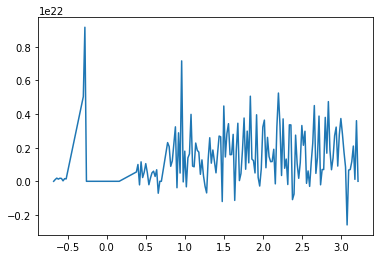

In [104]:
from decimal import getcontext, Decimal, ROUND_UP
from random import gauss
from math import sqrt

getcontext().prec = 3
def dec(i): return round(float(Decimal(i)), 3)
CLICK = 0.02

# full range from Mercury to Asteroids Belt is divided in 8 legs (0.68 + 3.18)/CLICKS clicks
clicks = []
values = []
for i in index:
    max_ = s['from-Earth-AU-max'][i]
    min_ = s['from-Earth-AU-min'][i]
    if i in inner_planets:
        for n in np.arange(
                max_,
                min_ + CLICK, 
                CLICK):
            clicks += [dec(n)]
    else:
        for n in np.arange(
                min_,
                max_ + CLICK,
                CLICK):
            clicks += [dec(n)]

values = [0 for c in clicks]

def find_zone(num):
    for i in index:
        if i in inner_planets:
            if s['from-Earth-AU-min'][i] >= num >= s['from-Earth-AU-max'][i]:
                return i, s['from-Earth-AU-min'][i], s['from-Earth-AU-max'][i]
        else:
            if s['from-Earth-AU-min'][i] <= num <= s['from-Earth-AU-max'][i]:
                return i, s['from-Earth-AU-min'][i], s['from-Earth-AU-max'][i]
            
    return None, None, None
    
for i, c in enumerate(clicks):
    zone, min_, max_ = find_zone(c)
    if zone:
        interval = abs(max_) - abs(min_)
        n_clicks = int(interval / CLICK)
        values[i] = gauss(.5, .5) * s['minable-kg'][zone]
        
print(len(clicks), len(values))
print(clicks[:10], values[:10])
            
import matplotlib.pyplot as plt

#plt.scatter(clicks, values)
plt.plot(np.array(clicks), np.array(values))
plt.show()


**Players technological levels:**

In [6]:
level = [i+1 for i in range(8)]

d = {
    "reach-au": pd.Series(
        [], index=level),
    "mass-reachable-percent": pd.Series([], index=level),
    "budget": pd.Series([], index=level)
    
}

ValueError: Wrong number of items passed 0, placement implies 8

<table>
<tr><th>level</th><th>reach (AU)</th><th>% of mass reachable</th><th>budget (credits)</th></tr>
<tr><td>1</td><td>0.002570694</td><td>0.000000001</td><td>1.00E+09</td></tr>
<tr><td>2</td><td>0.1</td><td>-	</td><td>-	</td></tr>
<tr><td>3</td><td>0.3</td><td>-	</td><td>-	</td></tr>
<tr><td>4</td><td>0.4</td><td>-	</td><td>-	</td></tr>
<tr><td>5</td><td>1</td><td>-	</td><td>-	</td></tr>
<tr><td>6</td><td>2</td><td>-	</td><td>-	</td></tr>
<tr><td>7</td><td>2.2</td><td>-	</td><td>-	</td></tr>
<tr><td>8</td><td>3.2</td><td>-	</td><td>-	</td></tr>
</table>

In [ ]:
"""
Distance weighted by planets and aggregates oprbits
"""
index = ['Mercury', 'Venus', 'NEO', 'Mars', 'Asteroids Belt']
terrestrial = ['Mercury', 'Venus', 'Mars']
print(crust_reachable)

s = {
    'from-Earth-AU-min': pd.Series(
        [1 - 0.31, 1 - 0.72, 0, 1.38 - 1, 1.78 - 1], index=index),
    'from-Earth-AU-max': pd.Series(
        [1 + 0.47, 1 + 0.73, 0.15, 1 + 1.67, 1 + 4.2], index=index),
    'mass-kg': pd.Series(
        [3.285e23, 4.867e24, 3.2275e8, 6.39e23, 3.2e21], 
        index=index)
    }

s['minable-kg'] = pd.Series(
        [s['mass-kg'][i] * crust_reachable if i in terrestrial else s['mass-kg'][i] * 0.95 for i in index], 
        index=index)

s = pd.DataFrame(s)
s